In [1]:
from sys import platform as _platform
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#if _platform =='linux2':
#    path = '../data/data_sleep/' 
#else:
#    #mets ton path ici et ça devrait marcher :)
#    path = ""
path = "./data/"

In [2]:
#frequencies=pd.read_csv(path+"data_frequences.csv").drop("Unnamed: 0", axis=1)
frequencies=pd.read_csv(path+"fft_eeg.csv")
frequencies_acc =pd.read_csv(path+"fft_acc.csv")

stats=pd.read_csv(path+"data_stat_feats.csv").drop("Unnamed: 0", axis=1)
labels=pd.read_csv(path+"challenge_output_data_training_file_sleep_stages_classification.csv", sep=";")

In [3]:
def select_freq_names(low, high, X_columns, prefix = ''):
    return [name for name in X_columns 
            if len(name.split('q'))==2 
            and name.split('freq')[0] == prefix
            and low<=float(name.split('freq')[1]) 
            and high>= float(name.split('freq')[1])]
def group_frequencies(name, low, high, frequencies, prefix = ''):
    frequencies[name]=(1./(high-low) * (frequencies[select_freq_names(low,high,frequencies.columns,prefix)])).sum(axis=1)

In [4]:
new_feat = ["delta", 'theta', 'alpha1','alpha2', 'beta']
#frequencies["delta"]=frequencies[select_freq_names(0,3,frequencies.columns)].sum(axis=1)
#frequencies["delta"]=frequencies[select_freq_names(0,3.99,frequencies.columns)].sum(axis=1)
#frequencies["theta"]=frequencies[select_freq_names(4,7.5,frequencies.columns)].sum(axis=1)
#frequencies["alpha"]=frequencies[select_freq_names(7.5,13.99,frequencies.columns)].sum(axis=1)
#frequencies["beta"]=frequencies[select_freq_names(14,50,frequencies.columns)].sum(axis=1)

def make_new_feats(frequencies):
    group_frequencies("delta", 0.8, 3.99, frequencies)
    group_frequencies("theta", 4, 7.499, frequencies)
    group_frequencies("alpha1", 7.5, 9.5, frequencies)
    group_frequencies("alpha2", 9.5, 13.99, frequencies)
    group_frequencies("beta", 14, 50, frequencies)
make_new_feats(frequencies)

In [5]:
frequencies_acc.describe()

,ACC_X.freq0.0,ACC_X.freq0.0666666666667,ACC_X.freq0.133333333333,ACC_X.freq0.2,ACC_X.freq0.266666666667,ACC_X.freq0.333333333333,ACC_X.freq0.4,ACC_X.freq0.466666666667,ACC_X.freq0.533333333333,ACC_X.freq0.6,ACC_X.freq0.666666666667,ACC_X.freq0.733333333333,ACC_X.freq0.8,ACC_X.freq0.866666666667,ACC_X.freq0.933333333333,ACC_X.freq1.0,ACC_X.freq1.06666666667,ACC_X.freq1.13333333333,ACC_X.freq1.2,ACC_X.freq1.26666666667,ACC_X.freq1.33333333333,ACC_X.freq1.4,ACC_X.freq1.46666666667,ACC_X.freq1.53333333333,ACC_X.freq1.6,ACC_X.freq1.66666666667,ACC_X.freq1.73333333333,ACC_X.freq1.8,ACC_X.freq1.86666666667,ACC_X.freq1.93333333333,ACC_X.freq2.0,ACC_X.freq2.06666666667,ACC_X.freq2.13333333333,ACC_X.freq2.2,ACC_X.freq2.26666666667,ACC_X.freq2.33333333333,ACC_X.freq2.4,ACC_X.freq2.46666666667,ACC_X.freq2.53333333333,ACC_X.freq2.6,ACC_X.freq2.66666666667,ACC_X.freq2.73333333333,ACC_X.freq2.8,ACC_X.freq2.86666666667,ACC_X.freq2.93333333333,ACC_X.freq3.0,ACC_X.freq3.06666666667,ACC_X.freq3.13333333333,ACC_X.freq3.2,ACC_X.freq3.26666666667,ACC_X.freq3.33333333333,ACC_X.freq3.4,ACC_X.freq3.46666666667,ACC_X.freq3.53333333333,ACC_X.freq3.6,ACC_X.freq3.66666666667,ACC_X.freq3.73333333333,ACC_X.freq3.8,ACC_X.freq3.86666666667,ACC_X.freq3.93333333333,ACC_X.freq4.0,ACC_X.freq4.06666666667,ACC_X.freq4.13333333333,ACC_X.freq4.2,ACC_X.freq4.26666666667,ACC_X.freq4.33333333333,ACC_X.freq4.4,ACC_X.freq4.46666666667,ACC_X.freq4.53333333333,ACC_X.freq4.6,ACC_X.freq4.66666666667,ACC_X.freq4.73333333333,ACC_X.freq4.8,ACC_X.freq4.86666666667,ACC_X.freq4.93333333333,ACC_Y.freq0.0,ACC_Y.freq0.0666666666667,ACC_Y.freq0.133333333333,ACC_Y.freq0.2,ACC_Y.freq0.266666666667,ACC_Y.freq0.333333333333,ACC_Y.freq0.4,ACC_Y.freq0.466666666667,ACC_Y.freq0.533333333333,ACC_Y.freq0.6,ACC_Y.freq0.666666666667,ACC_Y.freq0.733333333333,ACC_Y.freq0.8,ACC_Y.freq0.866666666667,ACC_Y.freq0.933333333333,ACC_Y.freq1.0,ACC_Y.freq1.06666666667,ACC_Y.freq1.13333333333,ACC_Y.freq1.2,ACC_Y.freq1.26666666667,ACC_Y.freq1.33333333333,ACC_Y.freq1.4,ACC_Y.freq1.46666666667,ACC_Y.freq1.53333333333,ACC_Y.freq1.6,ACC_Y.freq1.66666666667,ACC_Y.freq1.73333333333,ACC_Y.freq1.8,ACC_Y.freq1.86666666667,ACC_Y.freq1.93333333333,ACC_Y.freq2.0,ACC_Y.freq2.06666666667,ACC_Y.freq2.13333333333,ACC_Y.freq2.2,ACC_Y.freq2.26666666667,ACC_Y.freq2.33333333333,ACC_Y.freq2.4,ACC_Y.freq2.46666666667,ACC_Y.freq2.53333333333,ACC_Y.freq2.6,ACC_Y.freq2.66666666667,ACC_Y.freq2.73333333333,ACC_Y.freq2.8,ACC_Y.freq2.86666666667,ACC_Y.freq2.93333333333,ACC_Y.freq3.0,ACC_Y.freq3.06666666667,ACC_Y.freq3.13333333333,ACC_Y.freq3.2,ACC_Y.freq3.26666666667,ACC_Y.freq3.33333333333,ACC_Y.freq3.4,ACC_Y.freq3.46666666667,ACC_Y.freq3.53333333333,ACC_Y.freq3.6,ACC_Y.freq3.66666666667,ACC_Y.freq3.73333333333,ACC_Y.freq3.8,ACC_Y.freq3.86666666667,ACC_Y.freq3.93333333333,ACC_Y.freq4.0,ACC_Y.freq4.06666666667,ACC_Y.freq4.13333333333,ACC_Y.freq4.2,ACC_Y.freq4.26666666667,ACC_Y.freq4.33333333333,ACC_Y.freq4.4,ACC_Y.freq4.46666666667,ACC_Y.freq4.53333333333,ACC_Y.freq4.6,ACC_Y.freq4.66666666667,ACC_Y.freq4.73333333333,ACC_Y.freq4.8,ACC_Y.freq4.86666666667,ACC_Y.freq4.93333333333,ACC_Z.freq0.0,ACC_Z.freq0.0666666666667,ACC_Z.freq0.133333333333,ACC_Z.freq0.2,ACC_Z.freq0.266666666667,ACC_Z.freq0.333333333333,ACC_Z.freq0.4,ACC_Z.freq0.466666666667,ACC_Z.freq0.533333333333,ACC_Z.freq0.6,ACC_Z.freq0.666666666667,ACC_Z.freq0.733333333333,ACC_Z.freq0.8,ACC_Z.freq0.866666666667,ACC_Z.freq0.933333333333,ACC_Z.freq1.0,ACC_Z.freq1.06666666667,ACC_Z.freq1.13333333333,ACC_Z.freq1.2,ACC_Z.freq1.26666666667,ACC_Z.freq1.33333333333,ACC_Z.freq1.4,ACC_Z.freq1.46666666667,ACC_Z.freq1.53333333333,ACC_Z.freq1.6,ACC_Z.freq1.66666666667,ACC_Z.freq1.73333333333,ACC_Z.freq1.8,ACC_Z.freq1.86666666667,ACC_Z.freq1.93333333333,ACC_Z.freq2.0,ACC_Z.freq2.06666666667,ACC_Z.freq2.13333333333,ACC_Z.freq2.2,ACC_Z.freq2.26666666667,ACC_Z.freq2.33333333333,ACC_Z.freq2.4,ACC_Z.freq2.46666666667,ACC_Z.freq2.53333333333,ACC_Z.freq2.6,ACC_Z.freq2.66666666667,ACC_Z.freq2.7333333333

In [6]:
def regroup_acc_freq (frequencies_acc):
    for prefix in ['ACC_X.','ACC_Y.','ACC_Z.']:
        group_frequencies(prefix+"smaller_one",0.01,1, frequencies_acc,prefix)
        group_frequencies(prefix+"one_to_two",1.01,2, frequencies_acc,prefix)
        group_frequencies(prefix+"two_to_three",2.01,3, frequencies_acc,prefix)
        group_frequencies(prefix+"three_to_four",3.01,4, frequencies_acc,prefix)
        group_frequencies(prefix+"more_four",4,10, frequencies_acc,prefix)
regroup_acc_freq (frequencies_acc)

prefixes = ['ACC_X.','ACC_Y.','ACC_Z.']
frequencies_acc = frequencies_acc[[prefix+ x for x in["smaller_one","one_to_two","two_to_three",'more_four']for prefix in prefixes]]

In [7]:
train = pd.concat([frequencies[new_feat], stats, frequencies_acc], axis=1)

In [8]:
train.describe()

,delta,theta,alpha1,alpha2,beta,0_quantile_EEG,10_quantile_EEG,20_quantile_EEG,30_quantile_EEG,40_quantile_EEG,50_quantile_EEG,60_quantile_EEG,70_quantile_EEG,80_quantile_EEG,90_quantile_EEG,100_quantile_EEG,0_quantile_ACC_Z,10_quantile_ACC_Z,20_quantile_ACC_Z,30_quantile_ACC_Z,40_quantile_ACC_Z,50_quantile_ACC_Z,60_quantile_ACC_Z,70_quantile_ACC_Z,80_quantile_ACC_Z,90_quantile_ACC_Z,100_quantile_ACC_Z,0_quantile_ACC_Y,10_quantile_ACC_Y,20_quantile_ACC_Y,30_quantile_ACC_Y,40_quantile_ACC_Y,50_quantile_ACC_Y,60_quantile_ACC_Y,70_quantile_ACC_Y,80_quantile_ACC_Y,90_quantile_ACC_Y,100_quantile_ACC_Y,0_quantile_ACC_X,10_quantile_ACC_X,20_quantile_ACC_X,30_quantile_ACC_X,40_quantile_ACC_X,50_quantile_ACC_X,60_quantile_ACC_X,70_quantile_ACC_X,80_quantile_ACC_X,90_quantile_ACC_X,100_quantile_ACC_X,mean_EEG,mean_ACC_Z,mean_ACC_Y,mean_ACC_X,var_EEG,var_ACC_Z,var_ACC_Y,var_ACC_X,skew_EEG,skew_ACC_Z,skew_ACC_Y,skew_ACC_X,kurt_EEG,kurt_ACC_Z,kurt_ACC_Y,kurt_ACC_X,through_0,ACC_X.smaller_one,ACC_Y.smaller_one,ACC_Z.smaller_one,ACC_X.one_to_two,ACC_Y.one_to_two,ACC_Z.one_to_two,ACC_X.two_to_three,ACC_Y.two_to_three,ACC_Z.two_to_three,ACC_X.more_four,ACC_Y.more_four,ACC_Z.more_four
count,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,3.112900e+04,3.112900e+04,3.112900e+04,3.112900e+04,31129.000000,3.112700e+04,31095.000000,3.105900e+04,31129.000000,3.112900e+04,3.112900e+04,3.112900e+04,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000
mean,11.567826,3.568263,2.782985,2.082781,0.751534,-67.668904,-24.578816,-15.029817,-9.142491,-4.553969,-0.429837,3.709411,8.344859,14.295154,23.852064,70.926835,389079.403871,394942.680469,401722.919196,418578.215755,441054.816154,464406.560797,487958.291960,511829.372506,533244.536975,548457.120201,553119.307859,508458.001608,512433.331547,520669.693936,538912.377147,560303.097796,583160.354622,606010.389134,628979.842747,650082.743408,665331.568056,670117.303174,463043.459858,467174.530536,474999.947300,492067.066492,512800.096769,534592.475148,556714.590114,578462.955919,599379.979357,614626.710998,619450.027578,-0.307724,467403.641997,585548.917565,537272.507188,8.091409e+03,3.551936e+10,3.488588e+10,3.330232e+10,0.042390,-1.056223e+05,-44216.596762,-9.025399e+04,1.888080,4.234130e+12,7.224458e+13,-4.718321e+13,266.303897,55257.764563,59060.369738,68198.799131,45070.254993,46029.634280,52876.211177,58954.750214,60437.381404,57634.399315,6722.761692,6419.831198,7002.951855
std,75.572060,26.669366,17.343918,12.620050,5.308741,332.438831,44.725172,16.280377,9.902244,5.071556,1.948052,4.814270,9.619773,15.967630,29.583928,955.988966,561598.622147,565504.824485,564376.304941,559270.237759,557448.144970,564465.259308,581027.070964,606772.710146,635475.764328,658244.766881,662057.095991,670905.568374,672213.290684,668321.467589,660155.944471,655888.106042,658494.868185,668761.620419,686526.242650,708558.016987,726915.544490,729208.429707,586520.188548,587923.715579,583843.126280,575799.732902,571903.857252,576135.801496,588850.829758,609066.069517,634782.817990,656140.274833,661408.888219,0.960328,564113.518866,657677.633921,576190.718726,1.286930e+06,1.127120e+11,1.104874e+11,1.071621e+11,0.536758,2.484497e+06,2012175.965070,3.791622e+06,4.737300,3.619110e+14,2.258

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X = train.drop(["skew_ACC_X","skew_ACC_Y", "skew_ACC_Z"], axis=1)
scaler = StandardScaler().fit(X)
X_sc = scaler.transform(X)
X_columns = train.columns
X_train, X_test, y_train, y_test = train_test_split(
    X_sc, labels["TARGET"], test_size=0.2, random_state=0)

In [20]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.grid_search import RandomizedSearchCV
grid = {
    "max_depth": [5,10,15,20],
    "learning_rate": [0.1, 0.05, 0.01],
    "subsample" : [0.3, 0.6, 0.9, 1],
    "max_features": [0.3, 0.6, 0.9, 1]
}
gbc=GradientBoostingClassifier(
    n_estimators=20, 
    random_state=42,
)
GSCV=RandomizedSearchCV(
    gbc,
    grid,
    cv=3,
    random_state=42,
    n_jobs=2,
    verbose=1).fit(X_train, y_train)
prediction = GSCV.predict(X_test)
print "accuracy : ", accuracy_score(y_test, prediction)
print "accuracy on train : ", accuracy_score(y_train, GSCV.predict(X_train))
print "kappa :", cohen_kappa_score(y_test, prediction)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
accuracy :  0.854481207838
accuracy on train :  0.992370397141
kappa : 0.767001480045
CPU times: user 13min 51s, sys: 12.8 s, total: 14min 4s
Wall time: 1h 58min 7s


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed: 99.3min finished


In [21]:
GSCV.best_estimator_

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=15, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=42, subsample=0.9, verbose=0,
              warm_start=False)

In [27]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.grid_search import RandomizedSearchCV
"""grid = {
    "max_depth": [5,10,15,20],
    "learning_rate": [0.1, 0.05, 0.01],
    "subsample" : [0.3, 0.6, 0.9, 1],
    "max_features": [0.3, 0.6, 0.9, 1]
}
"""
gbc=GradientBoostingClassifier(
    n_estimators=200, 
    random_state=42,
    max_depth=15,
    max_features=0.6,
    subsample=0.9,
    learning_rate=0.05,
    verbose=0.5
).fit(X_train, y_train)
"""GSCV=RandomizedSearchCV(
    gbc,
    grid,
    cv=3,
    random_state=42,
    n_jobs=2,
    verbose=1).fit(X_train, y_train)
"""
prediction = gbc.predict(X_test)
print "accuracy : ", accuracy_score(y_test, prediction)
print "accuracy on train : ", accuracy_score(y_train, gbc.predict(X_train))
print "kappa :", cohen_kappa_score(y_test, prediction)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       29497.5782         274.8199          120.46m
         2       26723.2051         230.9616          131.77m
         3       24347.4722         192.4518          142.57m
         4       22295.6095         172.2205          147.47m
         5       20469.8613         151.7323          151.65m
         6       18838.5598         136.4614          154.07m
         7       17354.7474         119.8866          157.47m
         8       16028.5359         104.1997          159.13m
         9       14834.8087          97.4312          160.30m
        10       13717.6595          88.3335          160.76m
        11       12684.3023          75.4092          161.69m
        12       11788.9624          72.0625          162.10m
        13       10951.8964          63.9004          163.02m
        14       10189.0257          61.6545          161.74m
        15        9467.7110          54.8677          159.68m
       

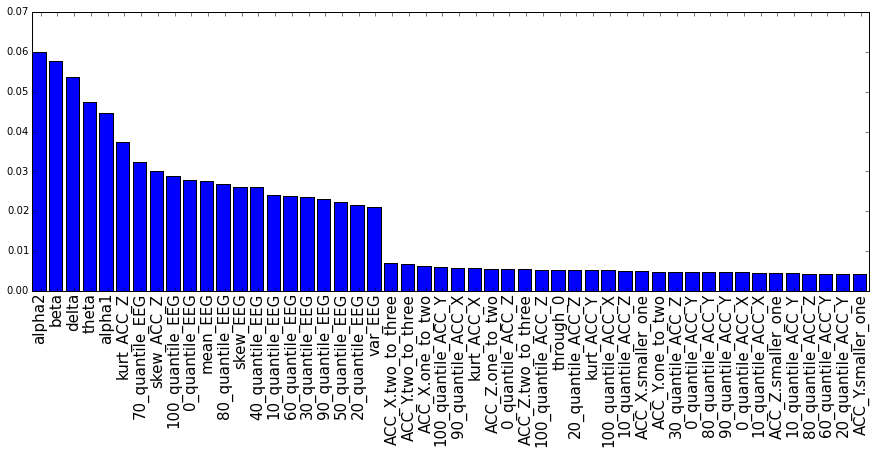

In [28]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(gbc.feature_importances_)[::-1][:50]

importances = gbc.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

In [29]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, [0,1,2,3,4], rotation=45)
    plt.yticks(tick_marks, [0,1,2,3,4])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


 [[ 183    1   49    7   12]
 [   7   40   32    0   16]
 [   7    0 2814  160  115]
 [   0    0  187 1723    2]
 [   4    0  164    3  700]]
Counter({2.0: 3096, 3.0: 1912, 4.0: 871, 0.0: 252, 1.0: 95}) Counter({2.0: 3246, 3.0: 1893, 4.0: 845, 0.0: 201, 1.0: 41})


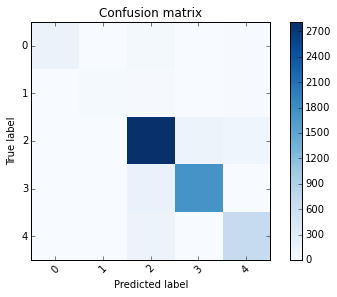

In [32]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, prediction)
print cm
plt.figure()
plot_confusion_matrix(cm)

import collections
print collections.Counter(y_test), collections.Counter(prediction)


In [121]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.grid_search import RandomizedSearchCV
"""grid = {
    "max_depth": [5,10,15,20],
    "learning_rate": [0.1, 0.05, 0.01],
    "subsample" : [0.3, 0.6, 0.9, 1],
    "max_features": [0.3, 0.6, 0.9, 1]
}
"""
gbc=GradientBoostingClassifier(
    n_estimators=200, 
    random_state=42,
    max_depth=15,
    max_features=0.6,
    subsample=0.9,
    learning_rate=0.05,
    verbose=0.5
).fit(X_sc, labels["TARGET"])
"""GSCV=RandomizedSearchCV(
    gbc,
    grid,
    cv=3,
    random_state=42,
    n_jobs=2,
    verbose=1).fit(X_train, y_train)
"""
prediction = gbc.predict(X_test)
print "accuracy : ", accuracy_score(y_test, prediction)
print "accuracy on train : ", accuracy_score(y_train, gbc.predict(X_train))
print "kappa :", cohen_kappa_score(y_test, prediction)

True